In [2]:
import pandas as pd
df=pd.read_csv('C:\\Users\\LENOVO\\Desktop\\Mira_DS\\ML\\Featureeng-2\\bhp.csv')

In [3]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
df.shape

(13200, 7)

In [31]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score

Also we can plot histogram to see how is the data distribution

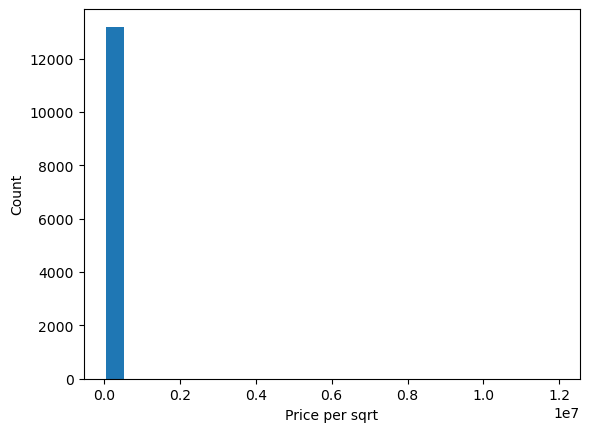

In [6]:
import matplotlib.pyplot as plt
plt.hist(df.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel('Price per sqrt')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers.<br>
Because we see only one bar with more than 12000 data points <br>
but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000<br>
hence we can hardly see any bar<br>

Using log scale can make visualization little better

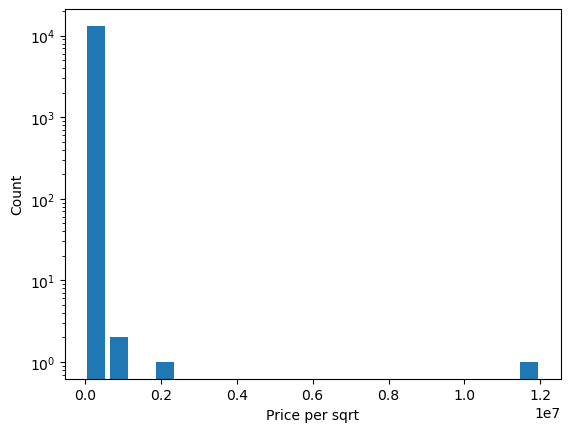

In [9]:
import matplotlib.pyplot as plt
plt.hist(df.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel('Price per sqrt')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

<b> Treat outliers using percentile

In [11]:
lower_limit,upper_limit=df.price_per_sqft.quantile([0.001, 0.999])
lower_limit,upper_limit

(1366.184, 50959.36200000098)

In [13]:
df[(df.price_per_sqft<lower_limit)|(df.price_per_sqft>upper_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


Above shows properties that has price_per_sqft value such as 500 rs which is very very low<br>
and we have price per sqft value like as 12000000 which is way too high. <br>
It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [14]:
updated_df=df[(df.price_per_sqft>lower_limit)&(df.price_per_sqft<upper_limit)]
updated_df.shape

(13172, 7)

In [16]:
df.shape[0]-updated_df.shape[0]

28

<B>Totally 28 outliers are removed

<b> Treat outliers using 4 standard deviation

In [18]:
upper_bound=updated_df.price_per_sqft.mean()+4*updated_df.price_per_sqft.std()
lower_bound=updated_df.price_per_sqft.mean()-4*updated_df.price_per_sqft.std()
upper_bound,lower_bound

(23227.73653589429, -9900.429065502549)

In [20]:
updated_df[(updated_df.price_per_sqft<lower_bound)|(updated_df.price_per_sqft>upper_bound)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
12095,other,7 Bedroom,2240.0,4.0,700.0,7,31250
3136,other,4 Bedroom,1200.0,4.0,350.0,4,29166
9636,other,4 Bedroom,2100.0,3.0,1000.0,4,47619
1770,other,10 Bedroom,1660.0,10.0,475.0,10,28614
8650,HAL 2nd Stage,4 Bedroom,2400.0,4.0,650.0,4,27083
9229,1st Phase JP Nagar,4 Bedroom,1200.0,4.0,300.0,4,25000
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
12334,Indira Nagar,4 Bedroom,2400.0,4.0,700.0,4,29166
12671,other,4 Bedroom,1200.0,5.0,325.0,4,27083
10536,other,4 Bedroom,2400.0,4.0,595.0,4,24791


In [21]:
new_df=updated_df[(updated_df.price_per_sqft>lower_bound)&(updated_df.price_per_sqft<upper_bound)]
new_df.shape

(13047, 7)

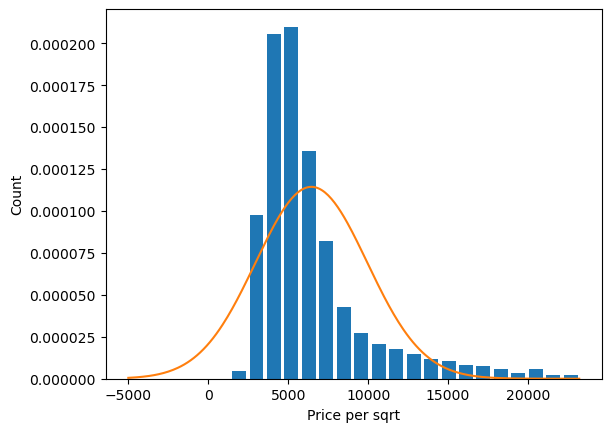

In [23]:
from scipy.stats import norm
from matplotlib import pyplot as plt
import numpy as np
plt.hist(new_df.price_per_sqft,bins=20,rwidth=0.8,density=True)
plt.xlabel('Price per sqrt')
plt.ylabel('Count')

rng=np.arange(-5000,new_df.price_per_sqft.max(),100)
plt.plot(rng,norm.pdf(rng,new_df.price_per_sqft.mean(),new_df.price_per_sqft.std()))
plt.show()

In [22]:
updated_df.shape[0]-new_df.shape[0]

125

<B>In this step we removed total 125 outliers

<B>For the same dataframe using zscore to remove outliers

In [25]:
updated_df['ZScore']=(updated_df['price_per_sqft']-updated_df['price_per_sqft'].mean())/updated_df['price_per_sqft'].std()
updated_df.sample(10)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24664\3030243333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df['ZScore']=(updated_df['price_per_sqft']-updated_df['price_per_sqft'].mean())/updated_df['price_per_sqft'].std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,ZScore
934,Kasavanhalli,4 Bedroom,3260.0,4.0,240.00,4,7361,0.168400
11707,8th Phase JP Nagar,3 BHK,1296.0,2.0,51.83,3,3999,-0.643478
4053,Bannerghatta Road,3 BHK,1788.0,3.0,90.00,3,5033,-0.393781
5591,Sultan Palaya,2 BHK,870.0,2.0,65.00,2,7471,0.194963
11137,2nd Stage Nagarbhavi,4 Bedroom,600.0,3.0,84.00,4,14000,1.771628
5235,Hebbal Kempapura,4 BHK,3895.0,4.0,495.00,4,12708,1.459627
10553,Jalahalli,2 BHK,1000.0,2.0,70.00,2,7000,0.081223
12204,Doddathoguru,2 BHK,940.0,2.0,32.90,2,3500,-0.763979
346,Ardendale,2 BHK,1100.0,2.0,43.25,2,3931,-0.659899
7300,Kathriguppe,3 BHK,1250.0,2.0,68.75,3,5500,-0.281007


In [26]:
updated_df[(updated_df.ZScore<-4)|(updated_df.ZScore>4)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,ZScore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [27]:
new_df1=updated_df[(updated_df.ZScore>-4)&(updated_df.ZScore<4)]
new_df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,ZScore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [28]:
new_df1.shape

(13047, 8)

In [29]:
updated_df.shape[0]-new_df1.shape[0]

125

In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation